In [59]:
import pandas as pd
import spacy
import textacy
import os
import logging
HOME = os.getcwd()
df = pd.read_csv(os.path.join(HOME, 'ethics_statement_frontiers_100.csv'), usecols = ['parsed'])
#preproc = textacy.preprocessing.make_pipeline(textacy.preprocessing.normalize.unicode,textacy.preprocessing.normalize.quotation_marks,textacy.preprocessing.normalize.whitespace)
#preproc_records = ((preproc(text), meta) for text, meta in records)
parsed_paragraphs= df.parsed.to_list()
for parsed_paragraph in parsed_paragraphs:
    parsed_paragraph.encode().decode("utf-8")
corpus = textacy.Corpus("en_core_web_sm", data=parsed_paragraphs)
print(parsed_paragraphs)

['The studies involving human participants were reviewed and approved by Ethics Committee of the Affiliated Hospital of Qingdao University School of Medicine. The patients/participants provided their written informed consent to participate in this study. Written informed consent was obtained from the individual(s) for the publication of any potentially identifiable images or data included in this article.', 'The studies involving human participants were reviewed and approved by Second affiliated hospital, school of medicine, zhejiang university. The patients/participants provided their written informed consent to participate in this study. Written informed consent was obtained from the individual(s) for the publication of any potentially identifiable images or data included in this article.', 'The studies involving human participants were reviewed and approved by the Ethics Board of Central China Normal University. The patients/participants provided their written informed consent to pa

Record(text='Mr. Speaker, 480,000 Federal employees are working without pay, a form of involuntary servitude; 280,000 Federal employees are not working, and they will be paid. Virtually all of these workers have mortgages to pay, children to feed, and financial obligations to meet.\nMr. Speaker, what is happening to these workers is immoral, is wrong, and must be rectified immediately. Newt Gingrich and the Republican leadership must not continue to hold the House and the American people hostage while they push their disastrous 7-year balanced budget plan. The gentleman from Georgia, Mr. Gingrich, and the Republican leadership must join Senator Dole and the entire Senate and pass a continuing resolution now, now to reopen Government.\nMr. Speaker, that is what the American people want, that is what they need, and that is what this body must do.', meta={'date': '1996-01-04', 'congress': 104, 'speaker_name': 'Bernie Sanders', 'speaker_party': 'I', 'title': 'JOIN THE SENATE AND PASS A CON

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\shweata\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-47b10dd814b5>", line 2, in <module>
    corpus = textacy.Corpus(spacy_lang, data=records)
  File "c:\users\shweata\appdata\local\programs\python\python38\lib\site-packages\textacy\corpus.py", line 159, in __init__
    self.add(data)
  File "c:\users\shweata\appdata\local\programs\python\python38\lib\site-packages\textacy\corpus.py", line 231, in add
    self.add_records(data, batch_size=batch_size, n_process=n_process)
  File "c:\users\shweata\appdata\local\programs\python\python38\lib\site-packages\textacy\corpus.py", line 310, in add_records
    for doc, meta in self.spacy_lang.pipe(
  File "c:\users\shweata\appdata\local\programs\python\python38\lib\site-packages\spacy\language.py", line 1451, in pipe
    for doc, context in zip(doc

TypeError: object of type 'NoneType' has no len()

In [5]:
#corpus.agg_metadata("date", min), corpus.agg_metadata("date", max)

('1996-01-04', '1999-10-08')

In [60]:
import textacy.extract
list(textacy.extract.entities(corpus[0]))

[Ethics Committee,
 Affiliated Hospital of Qingdao University School of Medicine]

In [61]:
from functools import partial
terms = list(textacy.extract.terms(
     corpus[0],
     ngs=partial(textacy.extract.ngrams, n=2, include_pos={"NOUN", "ADJ"}),
     ents=partial(textacy.extract.entities, include_types={"PERSON", "ORG", "GPE", "LOC"}),
     dedupe=False))
terms

[human participants,
 informed consent,
 informed consent,
 identifiable images,
 Ethics Committee,
 Affiliated Hospital of Qingdao University School of Medicine]

In [62]:
list(textacy.extract.terms_to_strings(terms, by="lemma"))


['human participant',
 'informed consent',
 'informed consent',
 'identifiable image',
 'Ethics Committee',
 'Affiliated Hospital of Qingdao University School of Medicine']

In [63]:
docs_terms = (
     textacy.extract.terms(
         doc,
         ngs=partial(textacy.extract.ngrams, n=2, include_pos={"NOUN", "ADJ"}),
         ents=partial(textacy.extract.entities, include_types={"PERSON", "ORG", "GPE", "LOC"}))
     for doc in corpus)
tokenized_docs = (
     textacy.extract.terms_to_strings(doc_terms, by="lemma")
     for doc_terms in docs_terms)

In [64]:
import textacy.representations
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs, tf_type="linear", idf_type="smooth")
doc_term_matrix

<95x162 sparse matrix of type '<class 'numpy.float64'>'
	with 462 stored elements in Compressed Sparse Row format>

In [65]:
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=5)
model.fit(doc_term_matrix)

c:\users\shweata\appdata\local\programs\python\python38\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [66]:
doc_topic_matrix = model.transform(doc_term_matrix)
doc_topic_matrix.shape

(95, 5)

In [67]:
doc_topic_matrix

array([[2.37971445e-02, 7.14856705e-01, 2.94981328e-02, 0.00000000e+00,
        6.01059008e-03],
       [2.00265904e-02, 5.99134124e-01, 5.79588657e-02, 6.21683572e-03,
        2.28342652e-02],
       [5.24420280e-02, 2.15816634e-01, 7.20024062e-03, 3.81118642e-02,
        2.45263116e-02],
       [9.50006370e-01, 3.38677461e-02, 4.36983271e-03, 2.99870872e-03,
        1.00944877e-02],
       [0.00000000e+00, 3.04875961e-01, 5.64152508e-02, 0.00000000e+00,
        3.58407384e-03],
       [0.00000000e+00, 6.99643886e-01, 4.49408823e-03, 0.00000000e+00,
        5.03613428e-04],
       [0.00000000e+00, 7.50527765e-01, 2.24909174e-02, 0.00000000e+00,
        1.86477224e-03],
       [0.00000000e+00, 2.22481569e-02, 3.12147407e-02, 7.27971685e-01,
        5.92287679e-03],
       [0.00000000e+00, 5.15975429e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [9.30093790e-01, 3.44300963e-01, 6.46528322e-02, 0.00000000e+00,
        1.76261046e-02],
       [0.00000000e+00, 6.6716

In [68]:
id_to_term = {id_: term for term, id_ in vocab.items()}
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=8):
     print(f"topic {topic_idx}: {'   '.join(terms)}")

topic 0: institutional requirement   ethical review   local legislation   national legislation   human participant   informed consent   Comité de   local context
topic 1: informed consent   legal guardian   identifiable image   human participant   Ethics Committee   Medical Ethics Committee   case report   Gregorio Marañón
topic 2: Ethics   AV Ethics   Belgium   Nr.2247   Medical Faculty of the Ludwig Maximilians University   Germany   final approval   Brugge Oostende
topic 3: ethic committee   Asan Medical Center   study protocol   consent requirement   informed consent   old program   Oita Okanoue Hospital   alternative opt
topic 4: Research Ethics Committee   Renmin University of China   ethic approval   approval number   informed consent   UK   UK Biobank   Guangdong Provincial People ’s Hospital


In [44]:
for topic_idx, doc_idxs in model.top_topic_docs(doc_topic_matrix, top_n=3):
     print(f"topic {topic_idx}: {'   '.join(corpus[doc_idx]._.meta['title'] for doc_idx in doc_idxs)}")

KeyError: 'title'

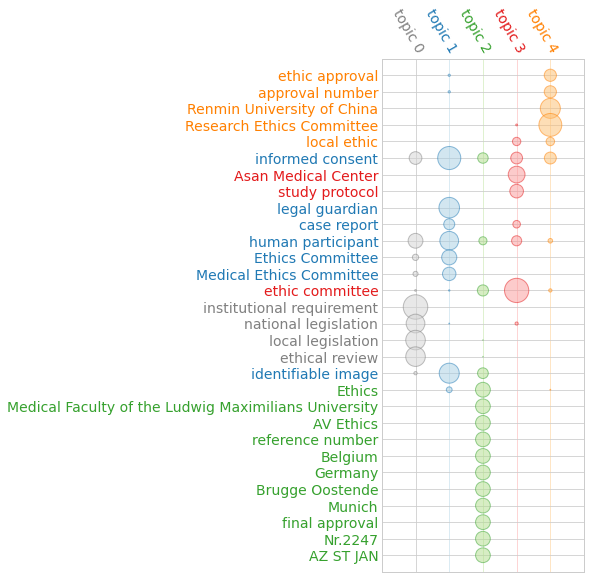

In [69]:
_ = model.termite_plot(doc_term_matrix, id_to_term, n_terms=30, highlight_topics=[1, 2, 3, 4, 5])